In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quandle is website that gives data about economics

In [84]:
data= pd.read_csv("sample_data/NSE-TATAGLOBAL.csv")

In [85]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


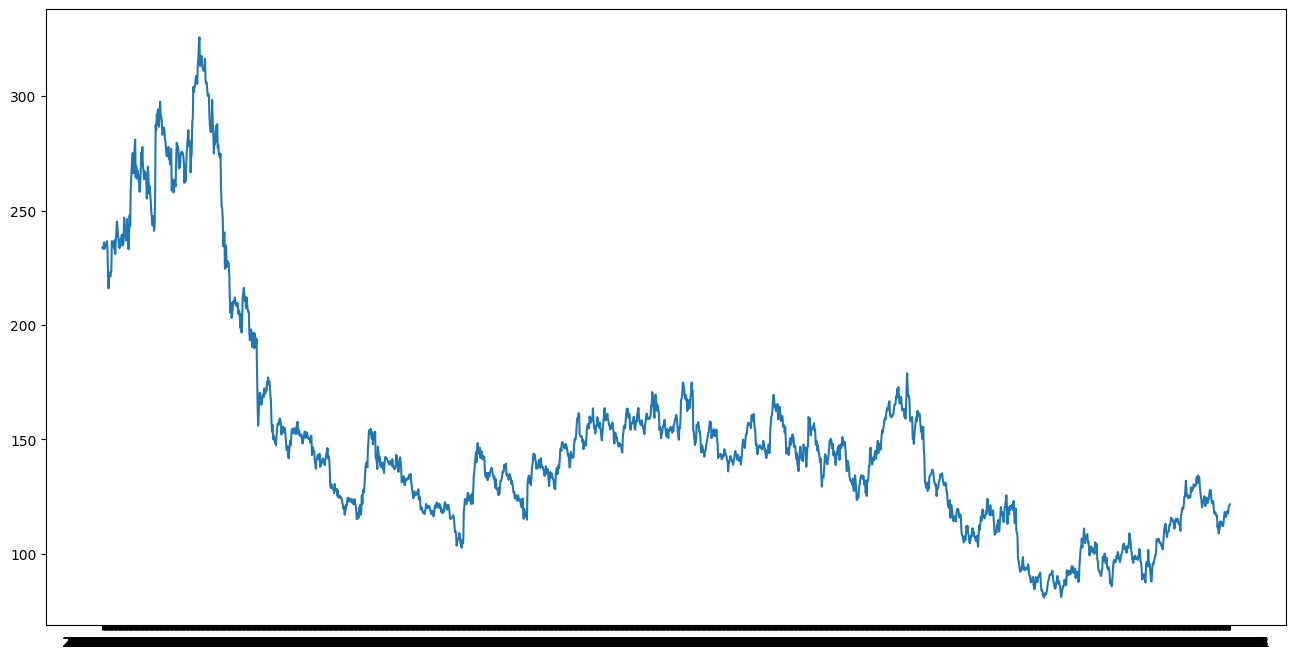

In [72]:
plt.figure(figsize=(16,8)) #increase figure size
plt.plot(data['Date'],data['Close']) #show data date and close

In [73]:
data["open-close"]=data["Open"]-data["Close"] #calculate the open and close stock price difference
data["high-low"]=data["High"]-data["Low"] #calculate difference between high and low stock price
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),open-close,high-low
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,0.30,5.75
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,1.30,5.70
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,5.75,7.50
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,-2.80,4.75
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,0.25,8.45


In [74]:
data=data.dropna() #remove null values preprocessing
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),open-close,high-low
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,0.30,5.75
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,1.30,5.70
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,5.75,7.50
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,-2.80,4.75
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,0.25,8.45
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59,0.40,9.05
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78,1.05,3.75
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70,2.85,5.75
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41,-3.45,7.75
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50,-10.50,13.40


**input features to predict weather to buy(+1) or sell(-1) the stock**

In [75]:
x=data[["open-close","high-low"]]
x.head()

,open-close,high-low
0,0.30,5.75
1,1.30,5.70
2,5.75,7.50
3,-2.80,4.75
4,0.25,8.45


In [76]:
y=np.where(data["Close"].shift(-1)>data["Close"],1,-1)
y
#if next day stock value is higher than current day then next is higher then buy 1 or value became less then sell -1

array([-1,  1,  1, ...,  1,  1, -1])

In [77]:
!pip install scikit-learn #Install the module using the correct name
from sklearn.model_selection import train_test_split #Import the module with the correct name
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50) #slipt the dataset into training and testing

**implementation of knn classifier**

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


#using grid search find the best parameter
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

#fit the model
model.fit(x_train,y_train)

accuracy_train=accuracy_score(y_train,model.predict(x_train))
accuracy_test=accuracy_score(y_test,model.predict(x_test))

print("accuracy of train data",accuracy_train)
print("accuracy of test data",accuracy_test)

accuracy of train data 0.8859764089121888
accuracy of test data 0.8546168958742633


In [79]:
actual_y=y_test
predicted_y=model.predict(x_test)

In [80]:
dataprediction=pd.DataFrame(list(zip(actual_y,predicted_y)),columns=["actual_y","predicted_y"])
dataprediction

,actual_y,predicted_y
0,-1,-1
1,1,1
2,1,1
3,1,-1
4,-1,-1
...,...,...
504,1,1
505,-1,-1
506,1,-1
507,1,1


In [81]:
graphical_representation=dataprediction.groupby(["actual_y","predicted_y"]).size()
graphical_representation

actual_y  predicted_y
-1        -1             218
           1              34
 1        -1              40
           1             217
dtype: int64

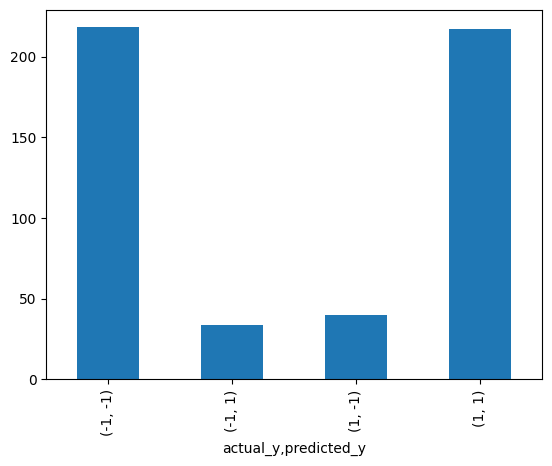

In [82]:
graphical_representation=dataprediction.groupby(["actual_y","predicted_y"]).size()
graphical_representation.plot(kind='bar') # use the plot function available in matplotlib.pyplot
plt.show()